## Khai báo các thư viện cần dùng

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Phần 1. Tiền xử lý dữ liệu

In [211]:
# Đọc dữ liệu từ file CSV
file_path = '../data/Life Expectancy Data.csv'  
df = pd.read_csv(file_path)

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 1.1 Ý nghĩa của các thuộc tính trong dữ liệu:

1. Country: Tên quốc gia.
2. Year: Năm thu thập dữ liệu.
3. Status: Trạng thái phát triển (Developed/Developing).
4. Life expectancy: Tuổi thọ trung bình (đầu ra - target).
5. Adult Mortality: Tỷ lệ tử vong ở người lớn.
6. Infant deaths: Số trẻ sơ sinh tử vong trên 1000 dân.
7. Alcohol: Tiêu thụ rượu bình quân đầu người.
8. Percentage expenditure: Chi tiêu y tế chiếm phần trăm GDP.
9. Hepatitis B: Tỷ lệ tiêm chủng viêm gan B.
10. Measles: Số ca sởi trên 1000 dân.
11. BMI: Chỉ số khối cơ thể trung bình.
12. Under-five deaths: Số trẻ dưới 5 tuổi tử vong trên 1000 dân.
13. Polio: Tỷ lệ tiêm chủng bại liệt.
14. Total expenditure: Tổng chi tiêu y tế chiếm phần trăm GDP.
15. Diphtheria: Tỷ lệ tiêm chủng bạch hầu.
16. HIV/AIDS: Số ca tử vong do HIV/AIDS trên 1000 dân.
17. GDP: GDP bình quân đầu người.
18. Population: Dân số quốc gia.
19. Thinness 1-19 years: Tỷ lệ gầy ở trẻ 1-19 tuổi.
20. Thinness 5-9 years: Tỷ lệ gầy ở trẻ 5-9 tuổi.
21. Income composition of resources: Chỉ số phân bổ thu nhập.
22. Schooling: Số năm học trung bình.

Các thuộc tính này dùng để dự đoán tuổi thọ trung bình dựa trên yếu tố y tế - xã hội.

Hiển thị kích thước của bảng dữ liệu

In [94]:
df.shape

(2938, 22)

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:
- Số hàng và số cột của df
- Tên cột và loại dữ liệu tương ứng của từng cột
- Số lượng giá trị không bị thiếu của từng cột
- Tổng dung lượng bộ nhớ mà df sử dụng

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Thống kê mô tả của target (Life expectancy)

In [96]:
df['Life expectancy'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

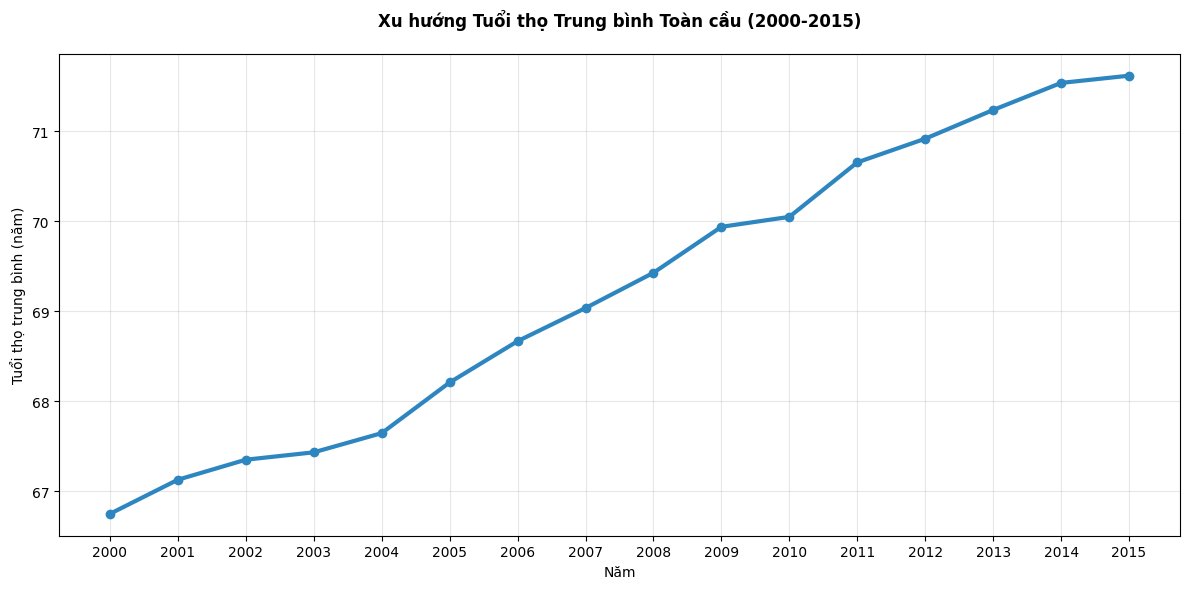

In [217]:
plt.figure(figsize=(12, 6))
yearly_life = df.groupby('Year')['Life expectancy'].mean()
plt.plot(yearly_life.index, yearly_life.values, marker='o', linewidth=3, markersize=6, color='#2E86C1')
plt.title('Xu hướng Tuổi thọ Trung bình Toàn cầu (2000-2015)', pad=20, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình (năm)')
plt.grid(True, alpha=0.3)
plt.xticks(range(2000, 2016))
plt.tight_layout()
plt.savefig('../results/figures/global_life_expectancy_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

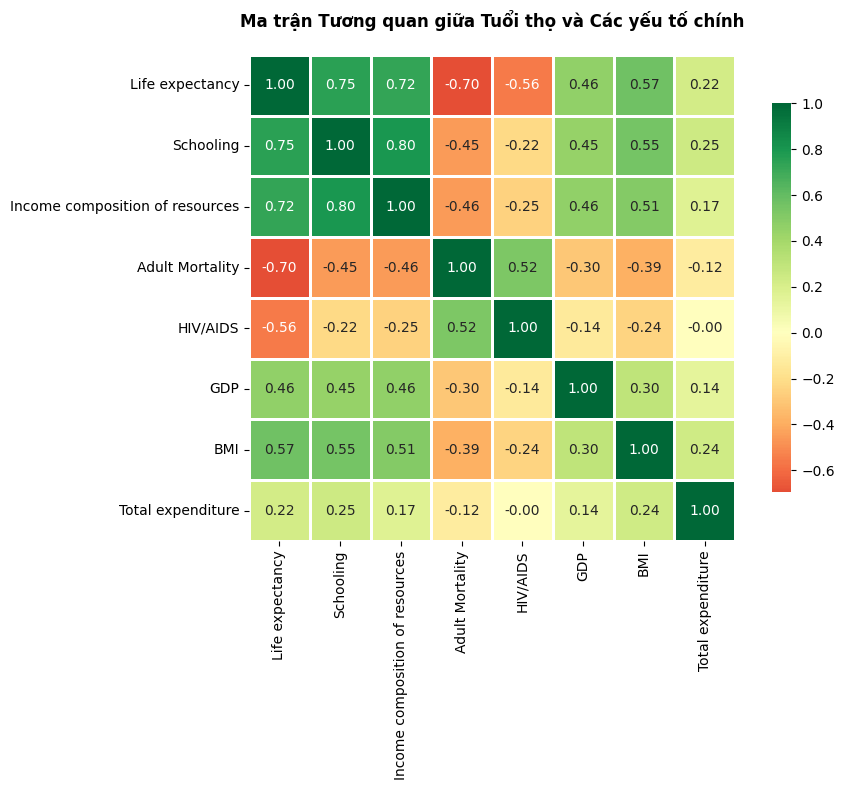

In [218]:
corr_vars = ['Life expectancy', 'Schooling', 'Income composition of resources', 
            'Adult Mortality', 'HIV/AIDS', 'GDP', 'BMI', 'Total expenditure']

corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f',
            square=True, linewidths=0.8, cbar_kws={"shrink": .8})
plt.title('Ma trận Tương quan giữa Tuổi thọ và Các yếu tố chính', pad=20, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

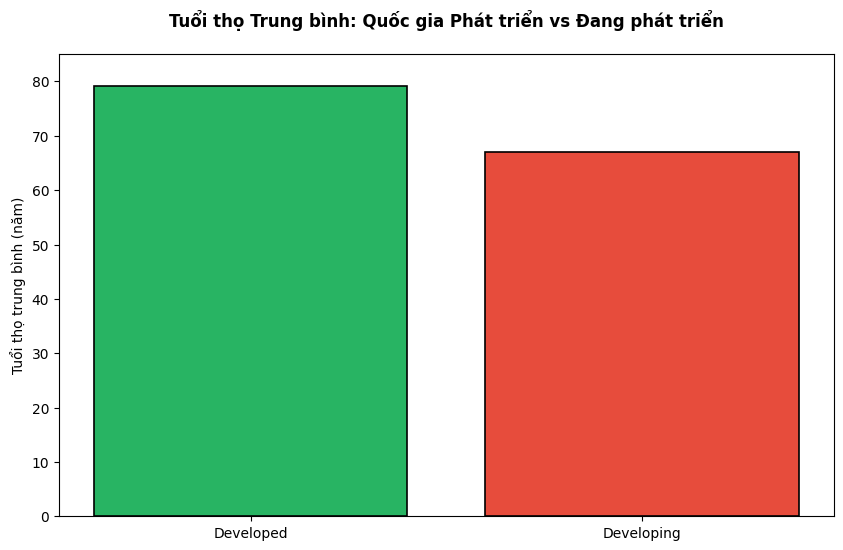

In [219]:
plt.figure(figsize=(10, 6))
status_life = df.groupby('Status')['Life expectancy'].mean().sort_values(ascending=False)
bars = plt.bar(status_life.index, status_life.values, color=['#28B463', '#E74C3C'], edgecolor='black', linewidth=1.2)
plt.title('Tuổi thọ Trung bình: Quốc gia Phát triển vs Đang phát triển', pad=20, fontweight='bold')
plt.ylabel('Tuổi thọ trung bình (năm)')
plt.ylim(0, 85)
plt.savefig('../results/figures/developed_vs_developing.png', dpi=300, bbox_inches='tight', facecolor='white')

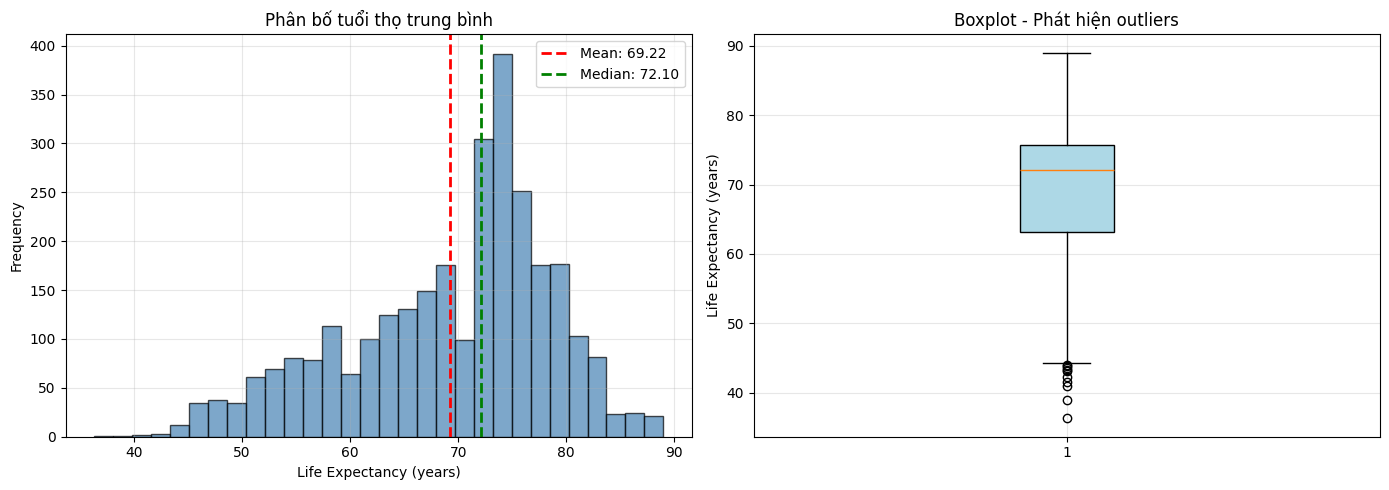

In [ ]:
# VẼ BIỂU ĐỒ PHÂN BỐ TARGET
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
axes[0].hist(df['Life expectancy'].dropna(), bins=30, alpha=0.7, 
            color='steelblue', edgecolor='black')
axes[0].axvline(df['Life expectancy'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: {df['Life expectancy'].mean():.2f}")
axes[0].axvline(df['Life expectancy'].median(), color='green', 
                linestyle='--', linewidth=2, label=f"Median: {df['Life expectancy'].median():.2f}")
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Phân bố tuổi thọ trung bình')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
box = axes[1].boxplot(df['Life expectancy'].dropna(), vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].set_title('Boxplot - Phát hiện outliers')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Lệnh df.isna().sum() trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:

df.isna(): Trả về một DataFrame với các giá

- df.isna(): Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
- sum(): Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột. Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [98]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [220]:
# Tính toán missing values
missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số missing values: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Tổng số missing values: 2563 (3.97%)

Chi tiết missing values theo từng cột:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


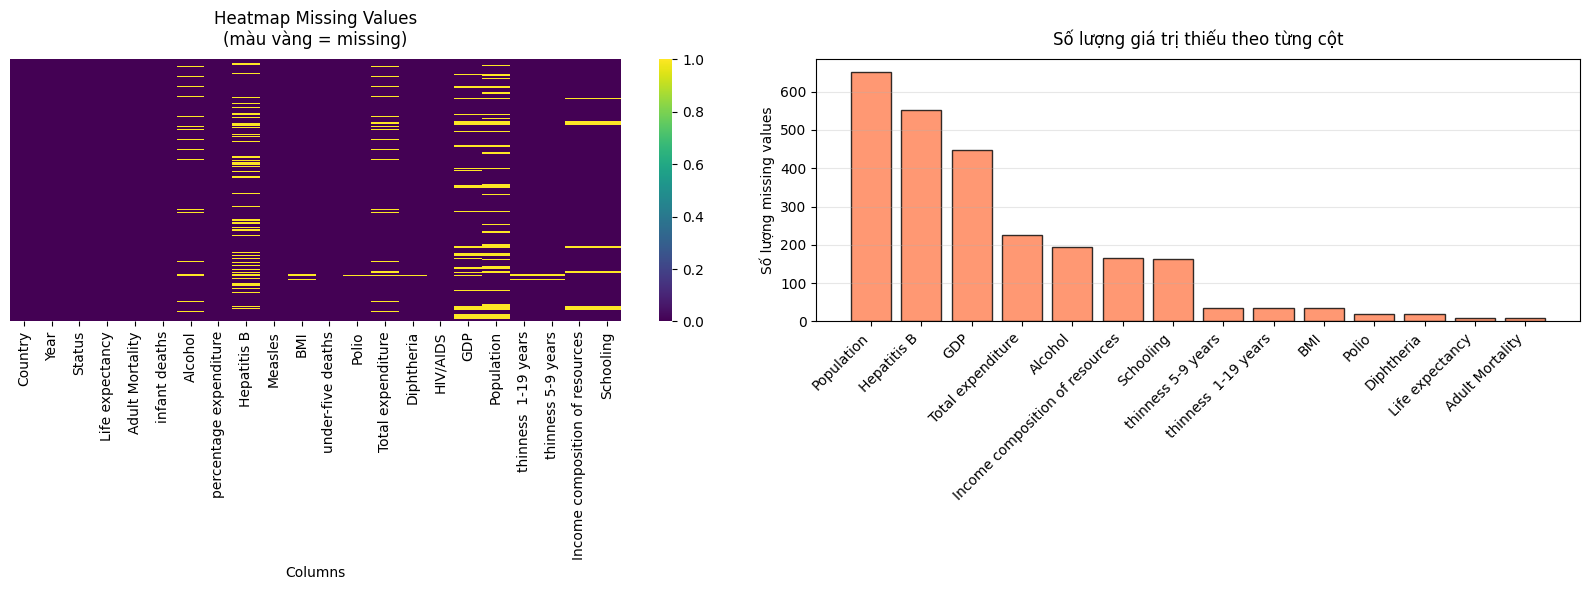

In [221]:
# VẼ 2 BIỂU ĐỒ MISSING VALUES (trên cùng 1 figure)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Heatmap Missing Values\n(màu vàng = missing)', fontsize=12, pad=10)
axes[0].set_xlabel('Columns')

# Subplot 2: Bar chart
missing_df = missing_before[missing_before > 0].sort_values(ascending=False)
axes[1].bar(range(len(missing_df)), missing_df.values, color='coral', edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(missing_df)))
axes[1].set_xticklabels(missing_df.index, rotation=45, ha='right')
axes[1].set_ylabel('Số lượng missing values')
axes[1].set_title('Số lượng giá trị thiếu theo từng cột', fontsize=12, pad=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.2 Xử lý missing values

Xử lý giá trị thiếu (Missing Values)

> **Công thức**:  
> $$
\hat{x}_{ij} = \frac{1}{n} \sum_{k=1}^{n} x_{kj} \quad \text{(nếu dùng mean)}
$$

> **Chiến lược**: Dùng `SimpleImputer(strategy='mean')`

In [222]:
# Impute target trước
if df['Life expectancy'].isna().sum() > 0:
    target_mean = df['Life expectancy'].mean()
    target_imputer = SimpleImputer(strategy='mean')
    df['Life expectancy'] = target_imputer.fit_transform(df[['Life expectancy']])
    print(f"✓ Đã impute 'Life expectancy' bằng mean = {target_mean:.2f}")

# Impute numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Life expectancy')
numeric_cols.remove('Year')

imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
print(f"✓ Đã impute {len(numeric_cols)} features numeric bằng mean")

# Kiểm tra sau khi xử lý
missing_after = df.isnull().sum().sum()
print(f"\nMissing values sau xử lý: {missing_after}")
print(f"Đã xử lý thành công {missing_count - missing_after} missing values!")

✓ Đã impute 'Life expectancy' bằng mean = 69.22
✓ Đã impute 18 features numeric bằng mean

Missing values sau xử lý: 0
Đã xử lý thành công 2563 missing values!


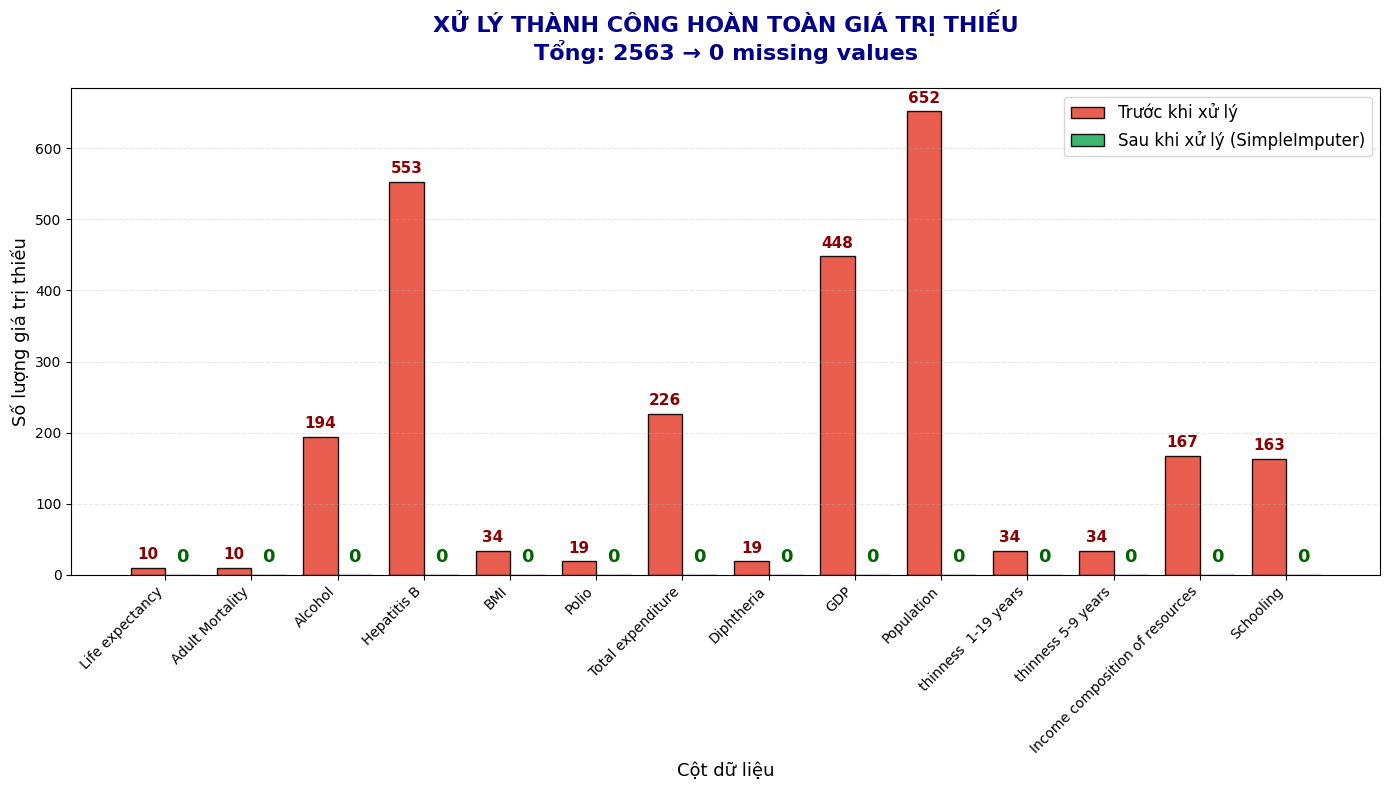

In [230]:
missing_before = pd.read_csv('../data/Life Expectancy Data.csv')
missing_before.columns = missing_before.columns.str.strip()
missing_before_count = missing_before.isnull().sum()
missing_before_total = missing_before_count.sum()

missing_after_count = df.isnull().sum()
missing_after_total = missing_after_count.sum()

cols_with_missing = missing_before_count[missing_before_count > 0].index
before_vals = missing_before_count[cols_with_missing]
after_vals  = missing_after_count[cols_with_missing] 

plt.figure(figsize=(14, 8))
x = np.arange(len(cols_with_missing))
width = 0.4

bars1 = plt.bar(x - width/2, before_vals, width, label='Trước khi xử lý', 
                color='#E74C3C', edgecolor='black', alpha=0.9)
bars2 = plt.bar(x + width/2, after_vals, width, label='Sau khi xử lý (SimpleImputer)', 
                color='#27AE60', edgecolor='black', alpha=0.9)

# Tiêu đề + nhãn
plt.title('XỬ LÝ THÀNH CÔNG HOÀN TOÀN GIÁ TRỊ THIẾU\n'
        f'Tổng: {missing_before_total} → 0 missing values', 
        fontsize=16, fontweight='bold', pad=20, color='darkblue')

plt.xlabel('Cột dữ liệu', fontsize=13)
plt.ylabel('Số lượng giá trị thiếu', fontsize=13)
plt.xticks(x, cols_with_missing, rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, bar in enumerate(bars1):
        height = bar.get_height()
        if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height + 8,
                        f'{int(height)}', ha='center', va='bottom', 
                        fontweight='bold', color='darkred', fontsize=11)

for i, bar in enumerate(bars2):
        plt.text(bar.get_x() + bar.get_width()/2., 12,
                '0', ha='center', va='bottom', 
                fontweight='bold', color='darkgreen', fontsize=13)

plt.tight_layout()
plt.savefig('../results/figures/missing_values_before_after_FINAL.png', 
        dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## 1.3 Mã hóa categorical features

DROP 'Country' vì:
- Có 193 unique values → tạo 192 dummy columns
- Gây curse of dimensionality, overfitting
- Country đã được thể hiện gián tiếp qua GDP, Schooling, Status, etc.

In [102]:
# DROP Country để tránh curse of dimensionality
df = df.drop('Country', axis=1)

# One-Hot Encoding cho Status (chỉ có 2 values: Developed/Developing)
print("\n One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)")
print(f"  Trước encoding: Status có {df['Status'].nunique()} unique values")
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
print(f"  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)")


 One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)
  Trước encoding: Status có 2 unique values
  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)


Kích thước dữ liệu sau preprocessing

In [103]:
df.shape

(2938, 21)


In dữ liệu sau khi làm sạch (5 dòng đầu)

In [104]:

df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


Tổng số features

In [105]:
print(f"\nTổng số features: {df.shape[1] - 1} (không tính target)")


Tổng số features: 20 (không tính target)


# Phần 2: Phân tích và trực quan hóa dữ liệu

## 2.1. Tách đầu vào và đầu ra

- Loại bỏ Life expectancy khỏi df
- axit = 1 --> xóa cột
- Phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là Life expectancy

In [106]:
# Tách đầu vào và đầu ra
X = df.drop(['Life expectancy'], axis=1)  # Loại bỏ target
y = df['Life expectancy']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)

train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.

test_size=0.3:

- test_size chỉ định tỷ lệ dữ liệu sẽ được dùng làm tập kiểm tra.
- Ở đây, test_size=0.3 có nghĩa là 30% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 80% dữ liệu còn lại sẽ được dùng cho tập huấn luyện.

random_state=42:

- random_state là một tham số được sử dụng để đảm bảo tính tái lập (reproducibility).
- Khi ta thiết lập random_state=42, việc chia dữ liệu sẽ luôn tạo ra cùng một kết quả mỗi khi bạn chạy mã, đảm bảo kết quả là nhất quán khi bạn thử lại.
- Giá trị 42 không có ý nghĩa đặc biệt, nó chỉ là một số được dùng làm hạt ngẫu nhiên (random seed).

Kết quả của train_test_split: Hàm này trả về bốn biến:

- X_train: Tập đặc trưng huấn luyện, chứa 70% của X: gồm 70% mẫu dữ liệu của nhãn M, 70% mẫu dữ liệu của nhãn B.
- X_test: Tập đặc trưng kiểm tra, chứa 30% của X: gồm 30% mẫu dữ liệu của nhãn M, 30% mẫu dữ liệu của nhãn B.
- y_train: Tập nhãn huấn luyện, chứa 70% của y: là nhãn của X_train, tỷ lệ như trên.
- y_test: Tập nhãn kiểm tra, chứa 30% của y.

In [107]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 2.2 Chuẩn hóa dữ liệu

Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:

Mean (trung bình) = 0.
Standard Deviation (độ lệch chuẩn) = 1.
Công thức chuẩn hóa

Xét lần lượt từng cột thuộc tính, với mỗi giá trị ( x ) thì ta chuẩn hóa thành x_scaled như sau:
$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$
Trong đó:

( x ) là giá trị của dữ liệu.
( N ) là số mẫu dữ liệu, ở đây cụ thể bằng 569.
( mu ) là giá trị trung bình của đặc trưng, được tính như sau:
                    $$
                    \mu = \frac{x1 + x2 + x3 + ... +xN}{N} 
                    $$

( sigma ) là độ lệch chuẩn của đặc trưng, được tính như sau:
                    $$
                    \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
                    $$

In [108]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Đã chuẩn hóa: mean ≈ 0, std ≈ 1")
print(f"X_train_scaled: mean={X_train_scaled.mean():.6f}, std={X_train_scaled.std():.6f}")

Đã chuẩn hóa: mean ≈ 0, std ≈ 1
X_train_scaled: mean=-0.000000, std=1.000000


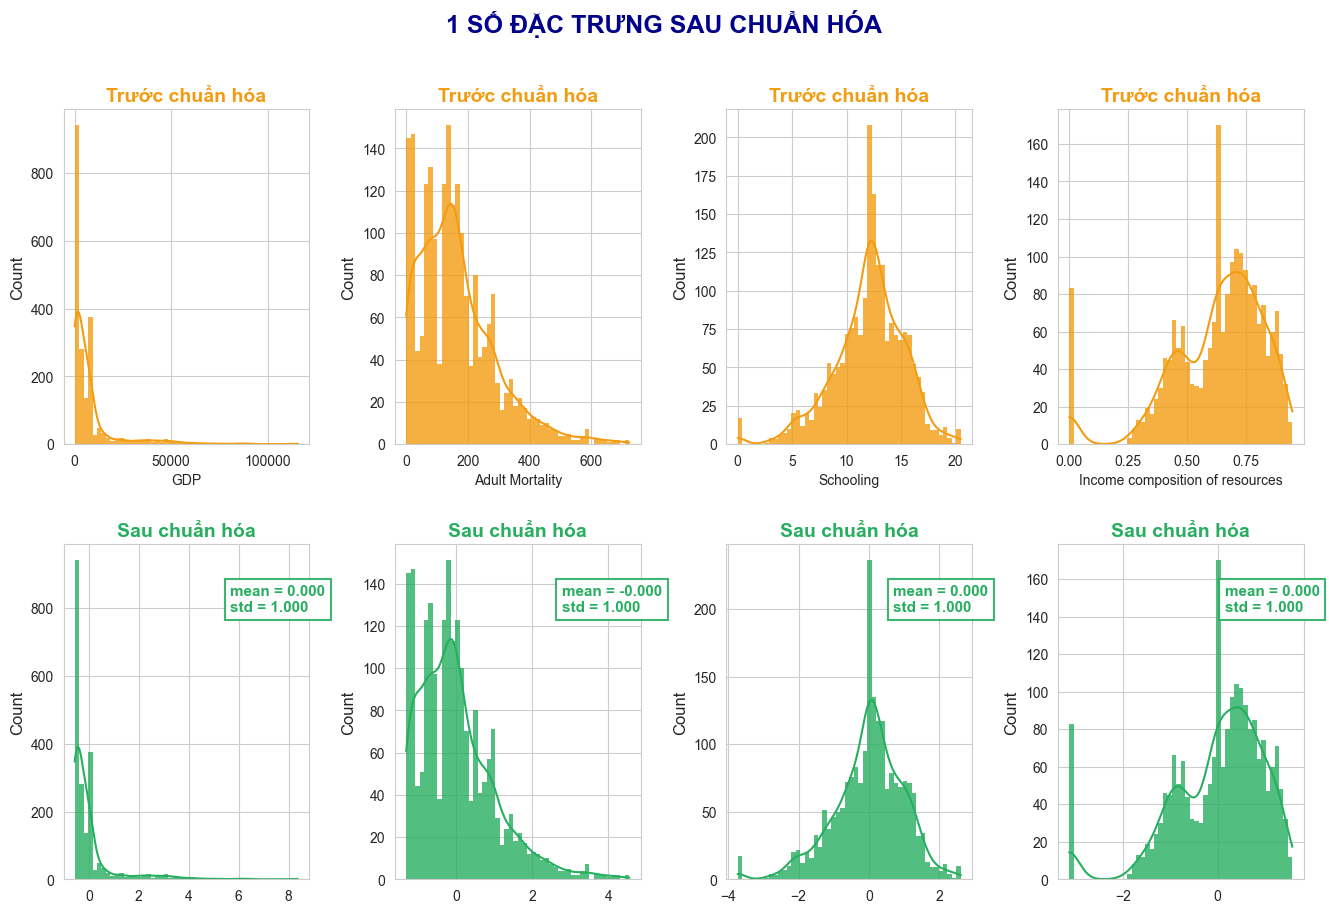

In [237]:
features_to_plot = [
    'GDP',                         
    'Adult Mortality',              
    'Schooling',                    
    'Income composition of resources'  
]

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.35)

sns.set_style("whitegrid")
palette = ["#F39C12", "#27AE60"] 

for i, col in enumerate(features_to_plot):
    ax_before = fig.add_subplot(gs[0, i])  
    ax_after  = fig.add_subplot(gs[1, i])  
    
    sns.histplot(X_train[col], kde=True, ax=ax_before, 
                color=palette[0], bins=50, alpha=0.8, linewidth=0)
    ax_before.set_title(f"Trước chuẩn hóa", fontsize=14, fontweight='bold', color=palette[0])
    ax_before.set_ylabel("Count", fontsize=12)
    ax_before.tick_params(axis='x', labelsize=10)
    
    col_idx = X_train.columns.get_loc(col)
    sns.histplot(X_train_scaled[:, col_idx], kde=True, ax=ax_after,
                color=palette[1], bins=50, alpha=0.8, linewidth=0)
    ax_after.set_title(f"Sau chuẩn hóa", fontsize=14, fontweight='bold', color=palette[1])
    ax_after.set_ylabel("Count", fontsize=12)
    
    mean_val = X_train_scaled[:, col_idx].mean()
    std_val  = X_train_scaled[:, col_idx].std()
    ax_after.text(0.68, 0.80, f'mean = {mean_val:.3f}\nstd = {std_val:.3f}',
                transform=ax_after.transAxes, fontsize=11, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.9, edgecolor=palette[1], linewidth=1.5),
                color=palette[1])

fig.suptitle('1 SỐ ĐẶC TRƯNG SAU CHUẨN HÓA',
            fontsize=18, fontweight='bold', y=0.98, color='darkblue')
plt.tight_layout()
plt.savefig('../results/figures/4_features_scaling_before_after_SLIDE.png',
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Phần 3: Xây dụng mô hình hồi quy

## 3.1 Mô hình Linear Regression

### 3.1.1 Sử dụng thư viện

In [133]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_T = y_train.reshape(1, -1)  
y_test_T  = y_test.reshape(1, -1)  

In [144]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_T.shape)
print(y_test_T.shape)

(2056, 20)
(882, 20)
(1, 2056)
(1, 882)


In [202]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_T.T)

lr_train_pred = lr.predict(X_train_scaled)
lr_test_pred = lr.predict(X_test_scaled)

print(f"Train MSE  : {mean_squared_error(y_train, lr_train_pred):.4f}   |   R²: {r2_score(y_train, lr_train_pred):.4f}")
print(f"Val   MSE  : {mean_squared_error(y_test, lr_test_pred):.4f}     |   R²: {r2_score(y_test, lr_test_pred):.4f}")

Train MSE  : 16.1940   |   R²: 0.8179
Val   MSE  : 16.7095     |   R²: 0.8212


### 3.1.2 Sử dụng công thức

### 3.1.2 Sử dụng công thức đóng

In [187]:
def linear_regression(X_train, y_train, X_val, y_val):

    ones = np.ones((1, X_train.shape[1]))       
    X_bias = np.vstack([X_train, ones])          

    XtX = X_bias @ X_bias.T                   
    Xty = X_bias @ y_train.T                      
    W = np.linalg.solve(XtX, Xty)                

    W_weights = W[:-1]      
    b = W[-1]          

    def predict(X):
        ones = np.ones((1, X.shape[1]))
        X_b = np.vstack([X, ones])
        return (W_weights.T @ X + b).T    

    y_train_pred = predict(X_train)
    y_val_pred   = predict(X_val)

    train_mse = mean_squared_error(y_train.T, y_train_pred)
    val_mse   = mean_squared_error(y_val.T,   y_val_pred)
    train_r2  = r2_score(y_train.T, y_train_pred)
    val_r2    = r2_score(y_val.T,   y_val_pred)

    

    return y_val_pred, train_mse, train_r2, val_mse, val_r2

In [189]:
predict_lr, train_mse_lr, train_r2_lr, val_mse_lr, val_r2_lr = linear_regression(
    X_train_scaled.T, y_train_T , X_test_scaled.T, y_test_T
)
print(f"Train MSE  : {train_mse_lr:.4f}   |   R²: {train_r2_lr:.4f}")
print(f"Val   MSE  : {val_mse_lr:.4f}     |   R²: {val_r2_lr:.4f}")



Train MSE  : 16.1940   |   R²: 0.8179
Val   MSE  : 16.7095     |   R²: 0.8212


In [161]:
predict_lr.shape

(882, 1)

### 3.1.2 Sử dụng Gradient Descent

In [162]:
def plot_training_curves(epochs, train_losses, val_losses, train_r2s, val_r2s,
                        title_prefix, figsize=(14, 10)):
    
    plt.figure(figsize=figsize)

    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_losses, color='green', linewidth=3, label='Train')
    plt.title(f'{title_prefix} - Training Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, val_losses, color='orange', linewidth=3, label='Validation')
    plt.title(f'{title_prefix} - Validation Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, train_r2s, color='green', linewidth=3)
    plt.title(f'{title_prefix} - Training R²', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('R² Score')
    plt.grid(True, alpha=0.3)
    plt.ylim(-1, 1)

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_r2s, color='orange', linewidth=3)
    plt.title(f'{title_prefix} - Validation R²', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('R² Score')
    plt.grid(True, alpha=0.3)
    plt.ylim(-1, 1)

    plt.tight_layout(pad=4.0)
    plt.show()

In [251]:
def cost_mse(y, yhat):
    return np.mean((y - yhat) ** 2)

def linear_regression_gd(X_train, y_train, X_val, y_val, iter):
    n_features = X_train.shape[0]
    n_samples  = X_train.shape[1]

    eta = 0.01
    W = 0.01 * np.random.randn(1, n_features)   
    b = np.zeros((1, 1))                        

    train_losses_gd = []
    val_losses_gd   = []
    train_r2s_gd    = []
    val_r2s_gd     = []
    epochs_gd       = []

    for i in range(iter + 1):
        Yhat_train = W @ X_train + b                  
        loss = cost_mse(y_train, Yhat_train)

        error = Yhat_train - y_train                   
        dW = error @ X_train.T / n_samples         
        db = np.sum(error, axis=1, keepdims=True) / n_samples       

        W -= eta * dW
        b -= eta * db

        if i % 250 == 0 and i != 0:
            Yhat_val = W @ X_val + b
            val_loss = cost_mse(y_val, Yhat_val)
            val_r2   = r2_score(y_val.T, Yhat_val.T)
            train_r2 = r2_score(y_train.T, Yhat_train.T)

            epochs_gd.append(i)
            train_losses_gd.append(loss)
            val_losses_gd.append(val_loss)
            train_r2s_gd.append(train_r2)
            val_r2s_gd.append(val_r2)
    y_train_pred = (W @ X_train + b).T          
    y_val_pred   = (W @ X_val   + b).T
    plot_training_curves(
        epochs_gd, train_losses_gd, val_losses_gd, train_r2s_gd, val_r2s_gd,
        title_prefix="Linear Regression"
    )
    def predict(X):
        return (W @ X + b).T
    return (
        predict(X_val),
        mean_squared_error(y_train.T, y_train_pred),
        r2_score(y_train.T, y_train_pred),
        mean_squared_error(y_val.T, y_val_pred),
        r2_score(y_val.T, y_val_pred),
    )

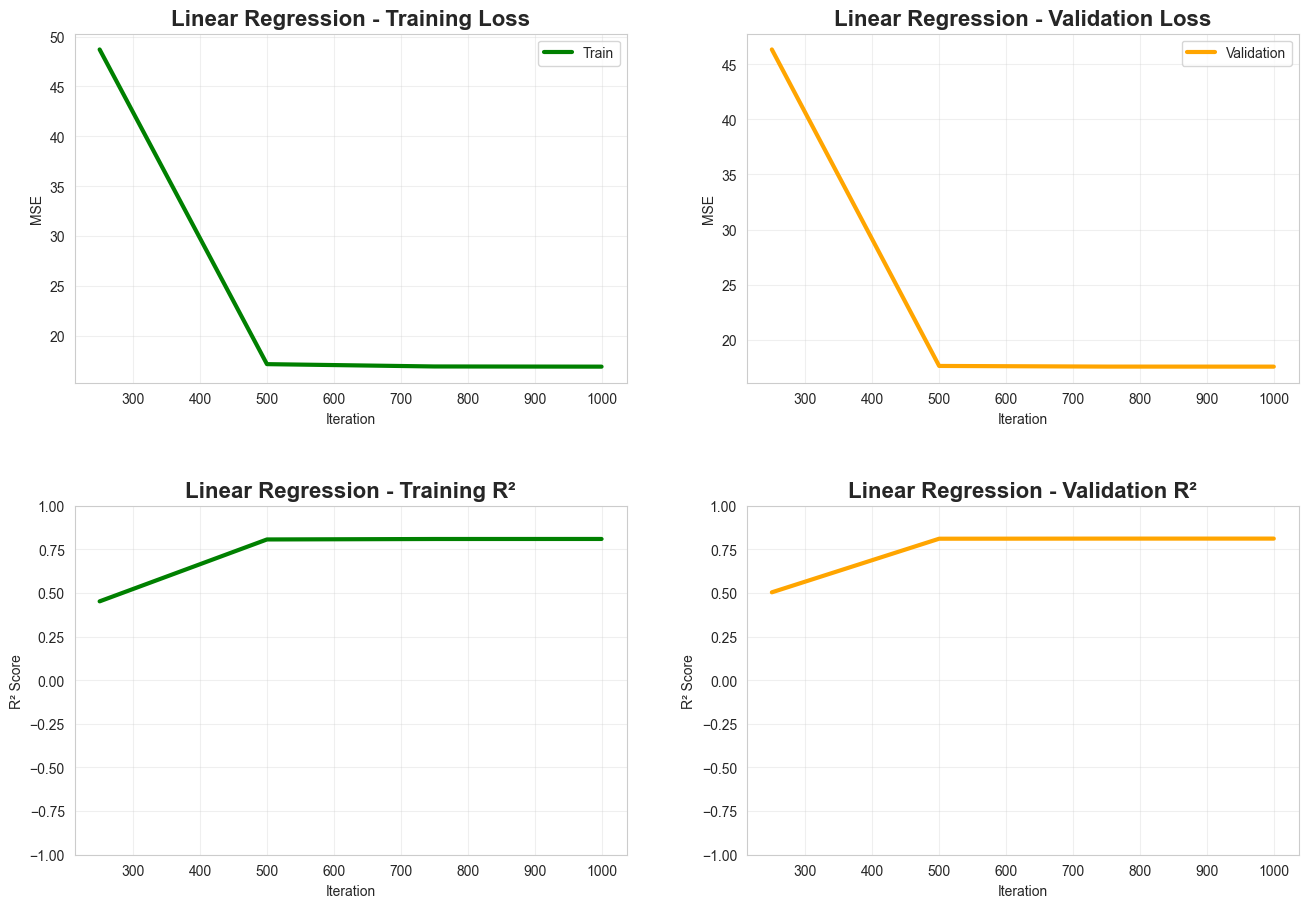

Train MSE  : 16.9050   |   R²: 0.8099
Val   MSE  : 17.5645     |   R²: 0.8120


In [252]:
predict_gd, mse_train_gd, r2_train_gd, mse_val_gd, r2_val_gd = linear_regression_gd(
    X_train_scaled.T, y_train_T, X_test_scaled.T, y_test_T, 1000
)
print(f"Train MSE  : {mse_train_gd:.4f}   |   R²: {r2_train_gd:.4f}")
print(f"Val   MSE  : {mse_val_gd:.4f}     |   R²: {r2_val_gd:.4f}")

In [ ]:
def evaluate(title,y_test, y_pred_test, test_r2, test_mse, train_r2, train_mse):
    # ============================= 1. Actual vs Predicted (Test set) =============================
    plt.subplot(2, 3, 1)
    plt.scatter(y_test, y_pred_test, alpha=0.6, color='#3498DB', s=60, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    plt.xlabel('Giá trị thực tế (Actual Life expectancy)')
    plt.ylabel('Giá trị dự đoán (Predicted)')
    plt.title(f'Actual vs Predicted (Test set)\nR² = {test_r2:.4f} | MSE = {test_mse:.4f}', 
            fontweight='bold', fontsize=13)
    plt.grid(alpha=0.3)

    # ============================= 2. Residuals vs Predicted =============================
    residuals = y_test - y_pred_test
    plt.subplot(2, 3, 2)
    plt.scatter(y_pred_test, residuals, alpha=0.6, color='#E74C3C', s=60, edgecolor='k')
    plt.axhline(0, color='black', linestyle='--', linewidth=2)
    plt.xlabel('Giá trị dự đoán')
    plt.ylabel('Residuals (Thực tế - Dự đoán)')
    plt.title('Residuals vs Predicted\n(Phân bố ngẫu nhiên → Mô hình tốt)', fontweight='bold')
    plt.grid(alpha=0.3)

    # ============================= 3. Residuals Histogram + KDE =============================
    plt.subplot(2, 3, 3)
    sns.histplot(residuals, kde=True, bins=40, color='#9B59B6', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title('Phân phối Residuals\n(Gần chuẩn, mean ≈ 0 → Linear Regression hợp lệ)', fontweight='bold')

    # ============================= 4. Q-Q Plot (kiểm tra normality của residuals) =============================
    from scipy import stats
    plt.subplot(2, 3, 4)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot của Residuals\n(Điểm nằm gần đường thẳng → residuals gần chuẩn)', fontweight='bold')

    # ============================= 5. Training vs Test Performance (R² & MSE) =============================
    plt.subplot(2, 3, 5)
    metrics = ['R² Score', 'MSE']
    train_scores = [train_r2, train_mse]
    test_scores  = [test_r2,  test_mse]

    x = np.arange(len(metrics))
    width = 0.35
    bars1 = plt.bar(x - width/2, train_scores, width, label='Train', color='#27AE60', edgecolor='black')
    bars2 = plt.bar(x + width/2, test_scores,  width, label='Test',  color='#E74C3C', edgecolor='black')

    plt.xlabel('Metrics')
    plt.ylabel('Giá trị')
    plt.title('So sánh hiệu suất Train vs Test', fontweight='bold')
    plt.xticks(x, metrics)
    plt.legend()

    # Ghi số lên đầu cột
    for bar in bars1 + bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (0.05 if 'R²' in metrics else 0.5),
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.suptitle(f'ĐÁNH GIÁ MÔ HÌNH {title} - LIFE EXPECTANCY PREDICTION',
                fontsize=18, fontweight='bold', y=0.98, color='darkblue')

    plt.tight_layout()
    plt.savefig(f'../results/figures/{title}_Full_Evaluation.png', dpi=300, bbox_inches='tight')
    plt.show()

In [243]:
y_test_T.shape

(1, 882)

In [248]:
predict_gd.shape

(2056, 1)

ValueError: x and y must be the same size

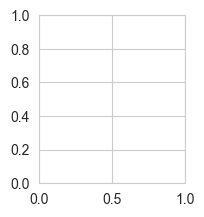

In [242]:
evaluate("Linear_Regression", y_test_T, predict_gd, r2_val_gd, mse_val_gd, r2_train_gd, mse_train_gd)

## 3.2 Mô hình ANN

### 3.2.1 Sử dụng thư viện

In [201]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train_scaled, y_train)

ann_train_pred = ann.predict(X_train_scaled)
ann_test_pred = ann.predict(X_test_scaled)

print(f"MSE Train: {mean_squared_error(y_train, ann_train_pred):.4f}, MSE Test: {mean_squared_error(y_test, ann_test_pred):.4f}")
print(f"R2 Train: {r2_score(y_train, ann_train_pred):.4f}, R2 Test: {r2_score(y_test, ann_test_pred):.4f}")

MSE Train: 6.1592, MSE Test: 8.9222
R2 Train: 0.9308, R2 Test: 0.9045


### 3.2.1 Sử dụng công thức

In [205]:
def cost_mse(y, yhat):
    return np.mean((y - yhat) ** 2)

def ann(X_train, y_train, X_val, y_val, h, iter):

    n_features = X_train.shape[0]
    n_samples  = X_train.shape[1]
    C = 1

    W1 = 0.01 * np.random.randn(h, n_features)
    b1 = np.zeros((h, 1))
    W2 = 0.01 * np.random.randn(C, h)
    b2 = np.zeros((C, 1))
    eta = 0.001

    train_losses = []
    val_losses   = []
    train_r2s    = []
    val_r2s      = []
    epochs       = []

    for i in range(iter + 1):
        Z1 = W1 @ X_train + b1
        A1 = np.maximum(Z1, 0)  
        Z2 = W2 @ A1 + b2
        Yhat = Z2 
        loss = cost_mse(y_train, Yhat)
        E2 = 2 * (Yhat - y_train) / n_samples    
        dW2 = E2 @ A1.T                      
        db2 = np.sum(E2, axis=1, keepdims=True)
        E1 = W2.T @ E2                      
        E1[Z1 <= 0] = 0                     
        dW1 = E1 @ X_train.T                
        db1 = np.sum(E1, axis=1, keepdims=True)

        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2

        if i % 100 == 0 and i != 0:
            train_loss = loss
            train_pred = Yhat.T
            train_r2 = r2_score(y_train.T, train_pred)

            Z1_val = W1 @ X_val + b1
            A1_val = np.maximum(0, Z1_val)
            Yhat_val = W2 @ A1_val + b2
            val_pred = Yhat_val.T
            val_loss = cost_mse(y_val, Yhat_val)
            val_r2 = r2_score(y_val.T, val_pred)

            epochs.append(i)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_r2s.append(train_r2)
            val_r2s.append(val_r2)
    plot_training_curves(epochs, train_losses, val_losses, train_r2s, val_r2s,
                        title_prefix="ANN")
    
    def predict(X):
        Z1 = W1 @ X + b1
        A1 = np.maximum(Z1, 0)
        Z2 = W2 @ A1 + b2
        return Z2

    y_train_pred = predict(X_train)
    y_val_pred   = predict(X_val)

    return (
        mean_squared_error(y_train.T, y_train_pred.T),
        r2_score(y_train.T, y_train_pred.T),
        mean_squared_error(y_val.T, y_val_pred.T),
        r2_score(y_val.T, y_val_pred.T),
    )


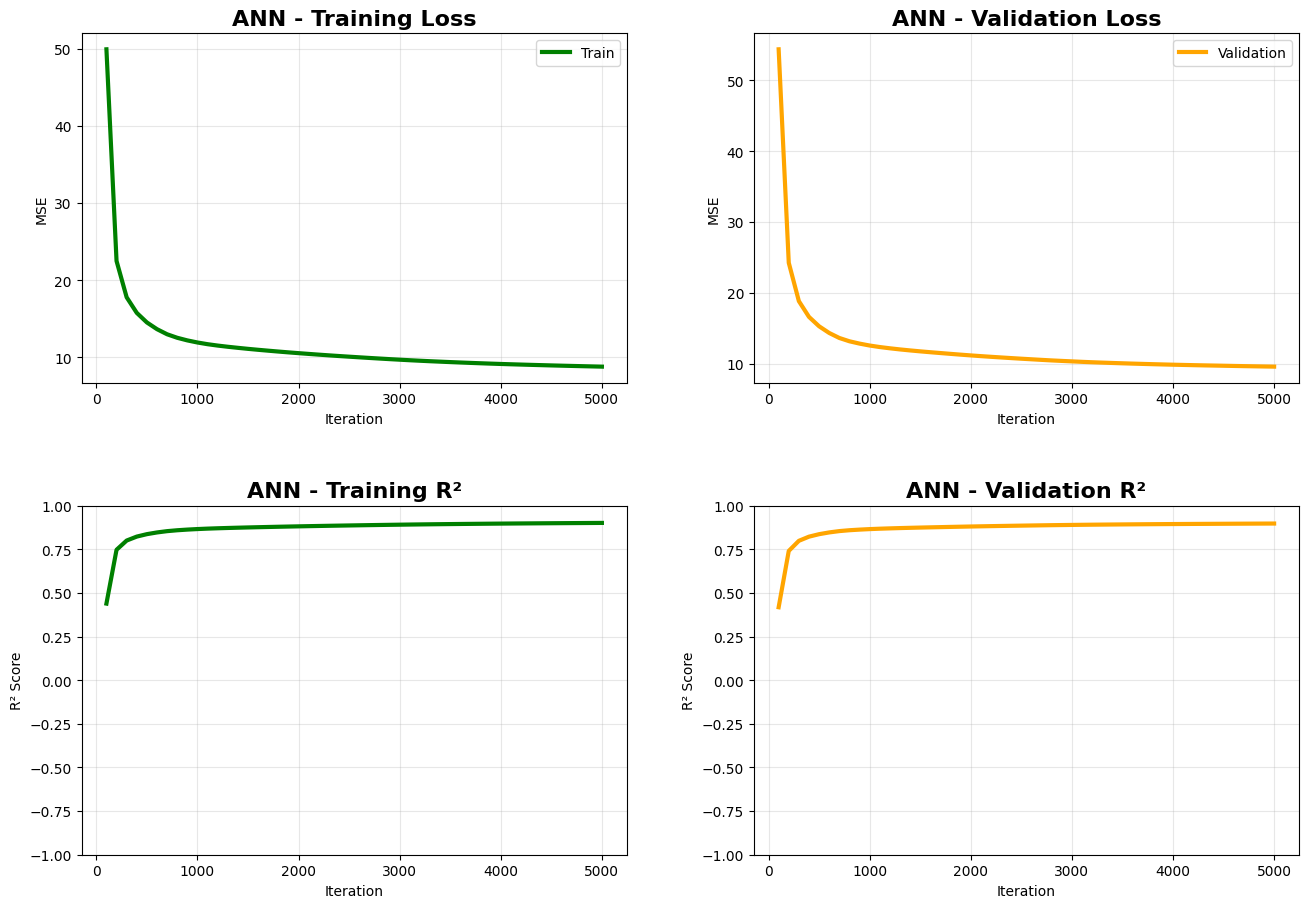

MSE Train: 8.7930, MSE Validation: 9.5705
R2 Train: 0.9011, R2 Validation: 0.8976


In [206]:
train_mse, train_r2, val_mse, val_r2= ann(X_train_scaled.T, y_train_T, X_test_scaled.T, y_test_T, 100, 5000)
print(f"MSE Train: {train_mse:.4f}, MSE Validation: {val_mse:.4f}")
print(f"R2 Train: {train_r2:.4f}, R2 Validation: {val_r2:.4f}")